## EA movie recommendation predct

In today’s technology driven world, recommender systems are socially and
economically critical for ensuring that individuals can make appropriate choices
surrounding the content they engage with on a daily basis. 
 
One application where this is especially true surrounds movie content recommendations; where intelligent
algorithms can help viewers find great titles from tens of thousands of options.

With this context, we have been challenged to construct a recommendation algorithm
based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.
Providing an accurate and robust solution to this challenge has immense economic
potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [51]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

# Libraries for data preparation and model building
from sklearn import *

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = None

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [52]:
df_train = pd.read_csv('train.csv') #loading training data

In [53]:
df_test = pd.read_csv('test.csv') #loading test data

In [54]:
df_movies = pd.read_csv('movies.csv')

In [55]:
df_genome_scores = pd.read_csv('genome_scores.csv') #loading training data

In [56]:
df_imdb_data = pd.read_csv('imdb_data.csv') #loading genome scores data

In [57]:
df_genome_tags = pd.read_csv('genome_tags.csv') #loading genome tags data

In [58]:
df_links = pd.read_csv('links.csv') #loading links data

In [59]:
df_tags = pd.read_csv('links.csv') #loading tags data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [75]:
# defining a function that will inspect each DataFrame

def df_inspect(df):
    print("Dataframe Info:")
    print(df.info())
    print("\n")
    print("Columns with Null Values:")
    print(df.isnull().sum())

In [60]:
df_train.head() #revealing training data

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [61]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [86]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [79]:
df_inspect(df_movies)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


Columns with Null Values:
movieId    0
title      0
genres     0
dtype: int64


In [63]:
df_imdb_data

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
...,...,...,...,...,...,...
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,NaN,man wrapped in a towel|man wears a thong|male ...
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,"DEM5,800,000",ski|ski resort|ampersand in title|drink in title
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,NaN,pirate|sword fight|korea|bandit
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,NaN,friend|friendship|television show|restaurant


In [80]:
df_inspect(df_imdb_data)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB
None


Columns with Null Values:
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


In [64]:
df_genome_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [81]:
df_inspect(df_genome_tags)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
None


Columns with Null Values:
tagId    0
tag      0
dtype: int64


In [65]:
df_genome_scores

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


In [82]:
df_inspect(df_genome_scores)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB
None


Columns with Null Values:
movieId      0
tagId        0
relevance    0
dtype: int64


In [66]:
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [83]:
df_inspect(df_links)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB
None


Columns with Null Values:
movieId      0
imdbId       0
tmdbId     107
dtype: int64


df_links[''].mean

In [67]:
df_tags

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [85]:
df_inspect(df_tags)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB
None


Columns with Null Values:
movieId      0
imdbId       0
tmdbId     107
dtype: int64


In [93]:
#Displays info about the columns whether they are numerical or not
df_train.info()
print("\n")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [69]:
df_train.isnull().sum()
df_test.isnull().sum()

userId     0
movieId    0
dtype: int64

In [70]:
df_train.shape

(10000038, 4)

In [71]:
df_test.shape

(5000019, 2)

In [72]:
unique_users = df_train['userId'].nunique()
print(f'unique users is; is {unique_users}')

unique users is; is 162541


In [73]:
N  = 100
top_users = df_train['userId'].value_counts().nlargest(100).index



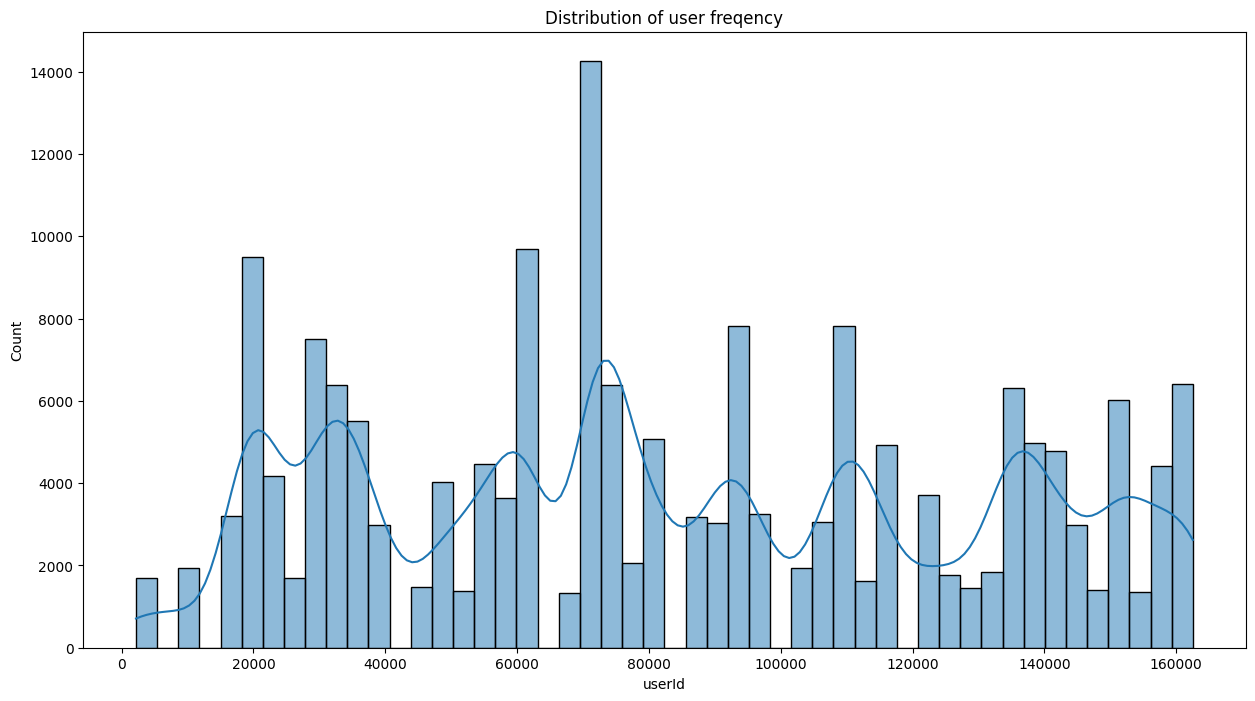

In [74]:
#distributon of user frequency

plt.figure(figsize=(15, 8))
sns.histplot(df_train[df_train['userId'].isin(top_users)], bins=50, kde=True, x = 'userId')
plt.title('Distribution of user freqency')
plt.xlabel('userId')
plt.show()

unique movies is; is 48213


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [87]:
df_links['tmdbId'].fillna(0, inplace = True)

In [96]:
unique_movies = df_train['movieId'].nunique()
print(f'unique movies is; is {unique_movies}')

unique movies is; is 48213


In [98]:
train_movies_combo = df_train.merge(df_movies, on = 'movieId', how = 'left') 

In [99]:
train_movies_combo

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller
...,...,...,...,...,...,...
10000033,136395,99114,5.0,1521235092,Django Unchained (2012),Action|Drama|Western
10000034,140078,553,3.0,1002580977,Tombstone (1993),Action|Drama|Western
10000035,154807,56782,4.0,1227674807,There Will Be Blood (2007),Drama|Western
10000036,85805,327,4.0,1479921530,Tank Girl (1995),Action|Comedy|Sci-Fi


In [112]:
N  = 5
top_movies = train_movies_combo['title'].value_counts().nlargest(5).index

In [119]:
movie_frequencies = train_movies_combo['title'].value_counts()



In [120]:
movie_frequencies

title
Shawshank Redemption, The (1994)                                 32831
Forrest Gump (1994)                                              32383
Pulp Fiction (1994)                                              31697
Silence of the Lambs, The (1991)                                 29444
Matrix, The (1999)                                               29014
                                                                 ...  
The Green, Green Grass of Home (1982)                                1
Bella Mafia (1997)                                                   1
Sniper (1932)                                                        1
Shinobi No Mono 3: Resurrection (Shin shinobi no mono) (1963)        1
Elia Kazan: A Director's Journey (1995)                              1
Name: count, Length: 48151, dtype: int64

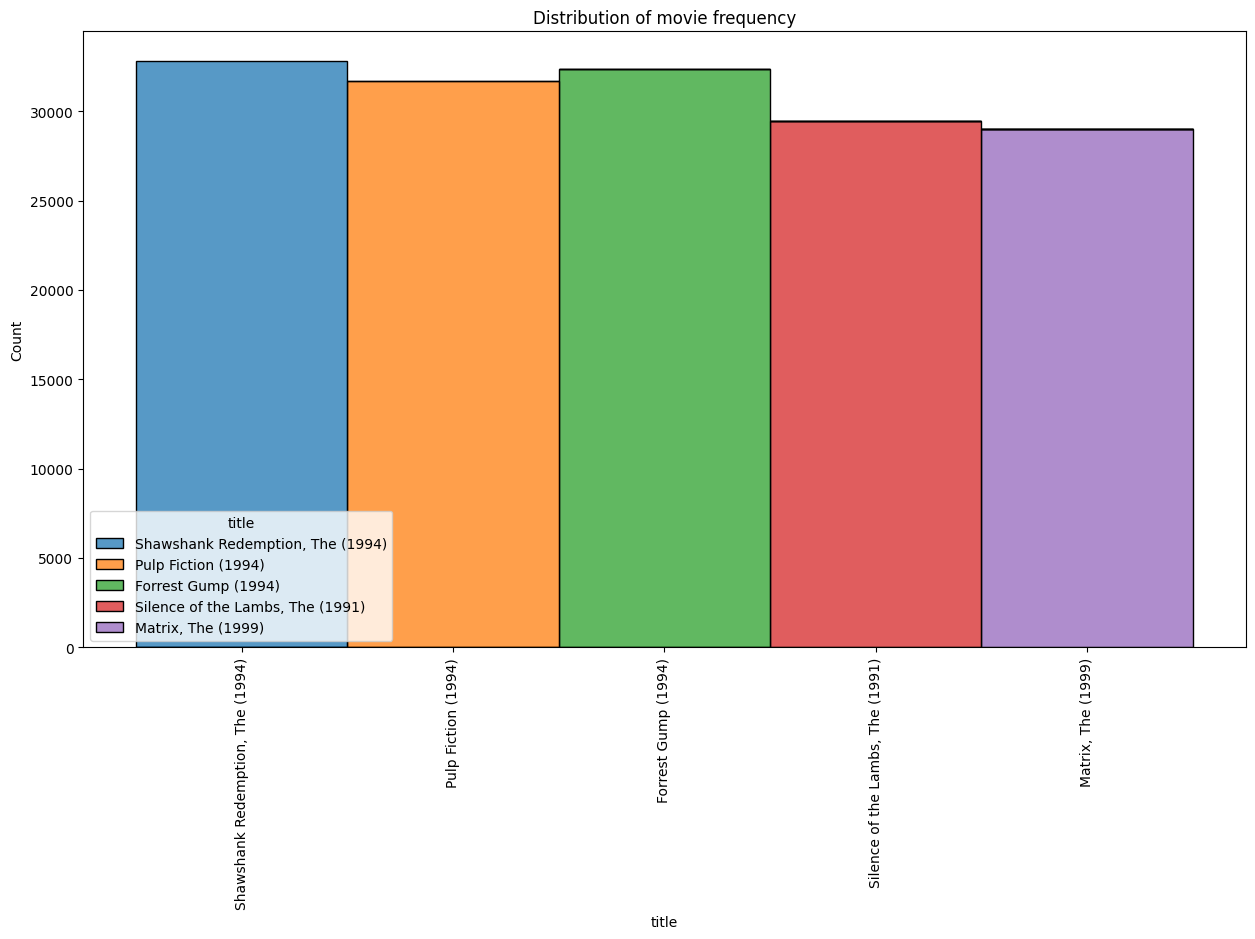

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_movies_combo is your DataFrame
movie_frequencies = train_movies_combo['title'].value_counts()

# Sort movies based on frequency in descending order
sorted_movies = movie_frequencies.index

# Select only the top movies based on your criteria (top_movies)
top_movies = sorted_movies[:N]  # Replace N with the desired number of top movies

# Create the histogram with the sorted movie order
plt.figure(figsize=(15, 8))
sns.histplot(train_movies_combo[train_movies_combo['title'].isin(top_movies)], bins=50, x='title', hue='title', multiple='stack')
plt.title('Distribution of movie frequency')
plt.xlabel('title')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---